In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

import robsblobs
from robsblobs.monitor import Monitor

In [2]:
minw = 380
maxw = 781
nwlns = 1000
wlns = np.linspace(minw, maxw, nwlns)
ncents = 100
nwidths = 50

cents = np.linspace(minw, maxw, ncents)
widths = np.linspace(1, maxw-minw, nwidths)

spect = np.zeros((ncents, nwidths, 2, len(wlns)))
for i in range(ncents):
    for j in range(nwidths):
        s = np.select(
            [
                np.logical_and(wlns >= cents[i]-widths[j]/2, wlns <= cents[i]+widths[j]/2), 
                np.logical_and(wlns <= cents[i]-widths[j]/2, wlns >= cents[i]+widths[j]/2)
            ],
            [
                1,
                0
            ]
        )

        spect[i, j, 0, :] = s
        spect[i, j, 1, :] = 1-s

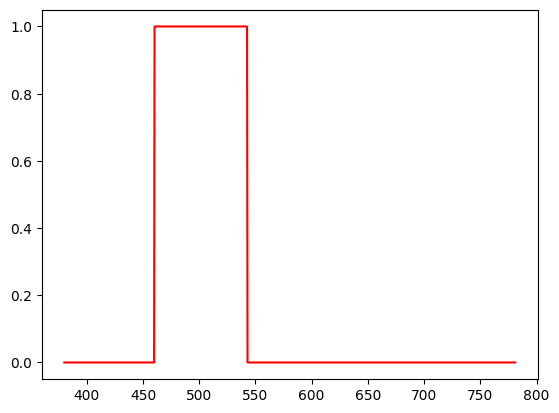

In [3]:
plt.plot(wlns, spect[30, 10, 0, :], 'r')

In [4]:
from scipy.interpolate import CubicSpline

konica_wlns = np.linspace(380, 781)
xyz = np.zeros((ncents, nwidths, 2, 3))
xyY = np.zeros((ncents, nwidths, 2, 3))
for i in range(ncents):
    for j in range(nwidths):
        s_interp = CubicSpline(wlns, spect[i, j, 0, :])
        s_new = s_interp(konica_wlns)
        xyz[i, j, 0, :] = robsblobs.spectra.spect2xyz(s_new * robsblobs.illuminants.d65_xie_macadam)
        xyY[i, j, 0, :] = robsblobs.cie_standard.XYZ2xyY(xyz[i, j, 0, :])

        s_interp = CubicSpline(wlns, spect[i, j, 1, :])
        s_new = s_interp(konica_wlns)
        xyz[i, j, 1, :] = robsblobs.spectra.spect2xyz(s_new * robsblobs.illuminants.d65_xie_macadam)
        xyY[i, j, 1, :] = robsblobs.cie_standard.XYZ2xyY(xyz[i, j, 1, :])

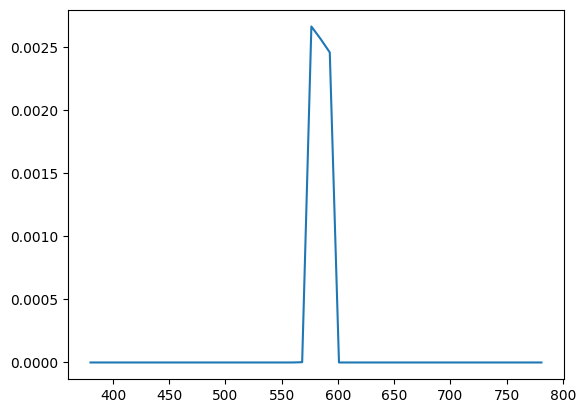

In [5]:
i = 50
j = 3
s_interp = CubicSpline(wlns, spect[i, j, 0, :])
s_new = s_interp(konica_wlns)
plt.plot(robsblobs.illuminants.konica_wlns, s_new * robsblobs.illuminants.d65_xie_macadam)

In [6]:
jing_monitor_data = sio.loadmat('./jing_monitor_primaries_all.mat')

monxyY_Jing = jing_monitor_data['Shanghai_Lenovo']['monxyY'][0][0]

jing_r_spectrum = jing_monitor_data['Shanghai_Lenovo']['red_primary_spectrum'][0][0].flatten()
jing_g_spectrum = jing_monitor_data['Shanghai_Lenovo']['green_primary_spectrum'][0][0].flatten()
jing_b_spectrum = jing_monitor_data['Shanghai_Lenovo']['blue_primary_spectrum'][0][0].flatten()

jing_estimated_w_spectrum = jing_r_spectrum + jing_g_spectrum + jing_b_spectrum

jing_wlns = jing_monitor_data['Shanghai_Lenovo']['wavelength'][0][0].flatten()

jing_R_max_luminance = monxyY_Jing[0, 2]
jing_G_max_luminance = monxyY_Jing[1, 2]
jing_B_max_luminance = monxyY_Jing[2, 2]

jing_estimated_w_luminance = jing_R_max_luminance + jing_G_max_luminance + jing_B_max_luminance

In [7]:
monitor_Jing = Monitor("Jing")
monitor_Jing.set_monxyY(monxyY_Jing)

monitor_Jing.set_R_spectrum(jing_wlns, jing_r_spectrum, jing_R_max_luminance)
monitor_Jing.set_G_spectrum(jing_wlns, jing_g_spectrum, jing_G_max_luminance)
monitor_Jing.set_B_spectrum(jing_wlns, jing_b_spectrum, jing_B_max_luminance)
monitor_Jing.set_W_spectrum(jing_wlns, jing_estimated_w_spectrum, jing_estimated_w_luminance)
monitor_Jing.calc_spectralQuants()

monitor_Jing.set_monGamma(np.array([2.156, 2.2482, 2.178]))

Luminances[ 0 ] =  8.25
Luminances[ 1 ] =  29.5
Luminances[ 2 ] =  4.35
bigl = 27.233358081  bigm = 14.866641919  bigs = 0.822306084094
L/L+M = 0.646873113564  S/L+M = 0.0195322110236
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  37.8197311787
Luminances[ 2 ] =  4.28026882126
bigl = 25.4366780274  bigm = 16.6633219726  bigs = 0.822306084094
L/L+M = 0.60419662773  S/L+M = 0.0195322110236
Luminances[ 0 ] =  16.5
Luminances[ 1 ] =  21.1802688213
Luminances[ 2 ] =  4.41973117874
bigl = 29.0300381346  bigm = 13.0699618654  bigs = 0.822306084094
L/L+M = 0.689549599398  S/L+M = 0.0195322110236
Blue Yellow Axis
Luminances[ 0 ] =  6.21221327112
Luminances[ 1 ] =  35.8877867289
Luminances[ 2 ] =  0.0
bigl = 27.233358081  bigm = 14.866641919  bigs = 0.0910183261092
L/L+M = 0.646873113564  S/L+M = 0.00216195548953
Luminances[ 0 ] =  10.2877867289
Luminances[ 1 ] =  23.1122132711
Luminances[ 2 ] =  8.7
bigl = 27.233358081  bigm = 14.866641919  bigs = 1.55359384208
L/L+M = 0.646873113564 

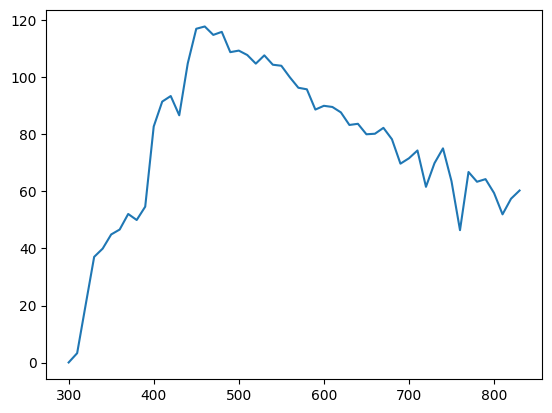

In [8]:
plt.plot(robsblobs.illuminants.d65_wlns, robsblobs.illuminants.d65_spect)

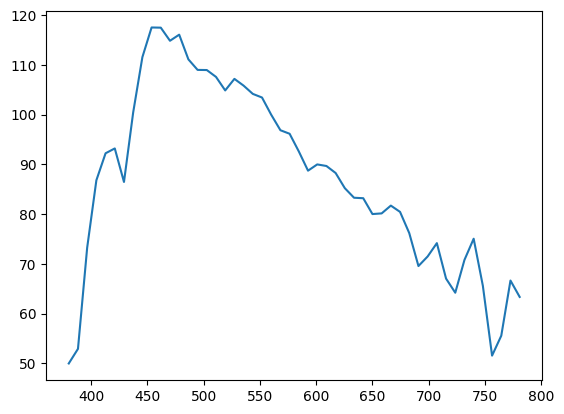

In [9]:
plt.plot(robsblobs.illuminants.konica_wlns, robsblobs.illuminants.d65_new)

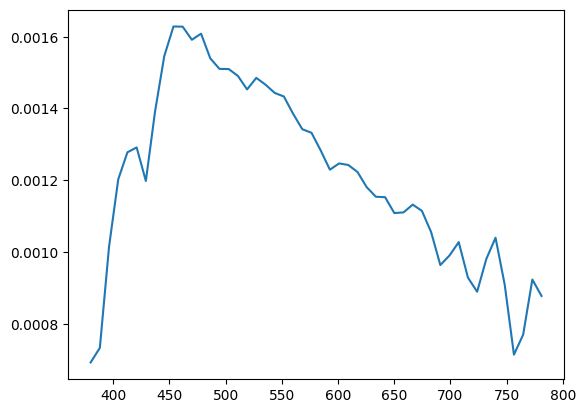

In [10]:
plt.plot(robsblobs.illuminants.konica_wlns, robsblobs.illuminants.d65_xyz_corr)

array([   0.3127985 ,    0.32919868,  200.        ])

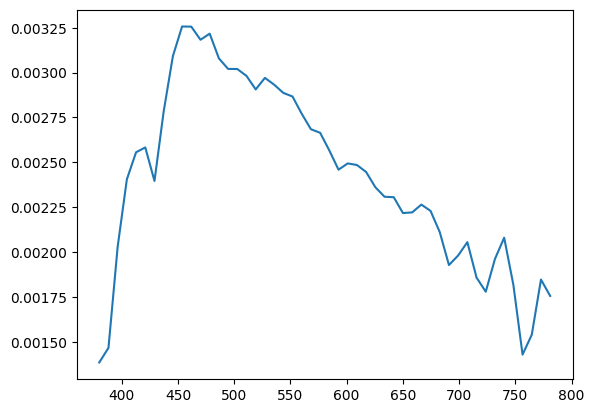

In [11]:
plt.plot(robsblobs.illuminants.konica_wlns, robsblobs.illuminants.d65_xie_macadam)
robsblobs.cie_standard.XYZ2xyY(robsblobs.spectra.spect2xyz(robsblobs.illuminants.d65_xie_macadam))

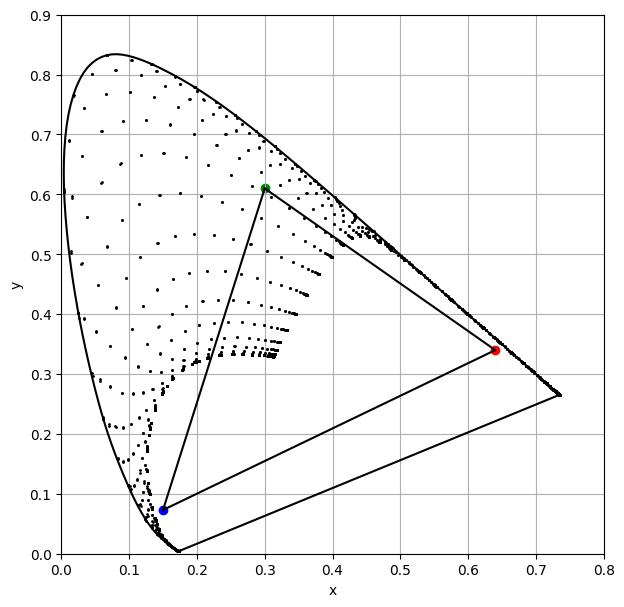

In [12]:
fig, ax = robsblobs.plotting.xyY_fig(monitor_Jing)
ax.plot(xyY[:, :, 0, 0].flatten(), xyY[:, :, 0, 1].flatten(), 'o', color='black', markersize=1)

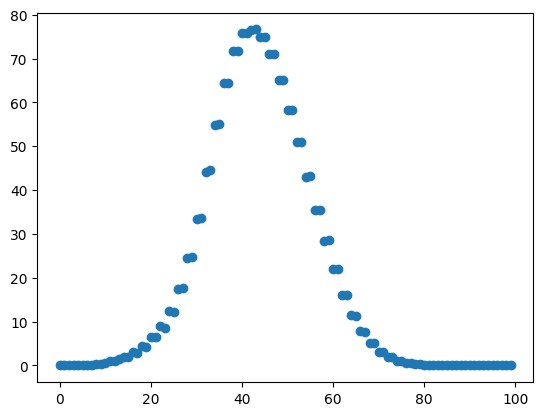

In [13]:
plt.plot(xyY[:, 5, 0, 2].flatten(), 'o')

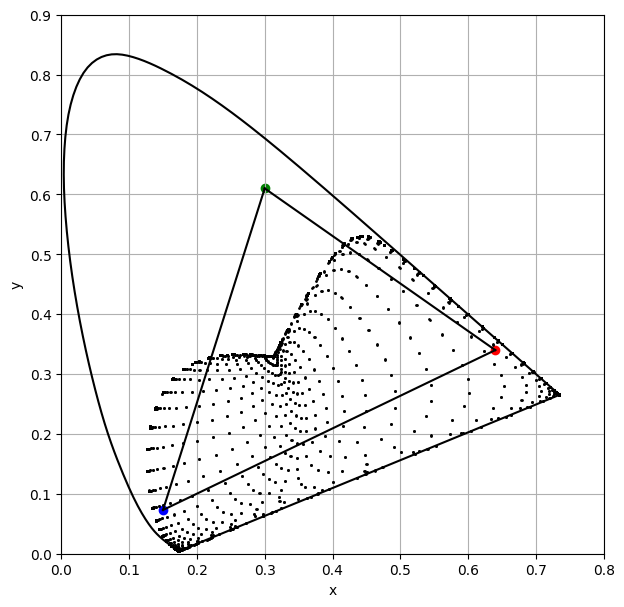

In [14]:
fig, ax = robsblobs.plotting.xyY_fig(monitor_Jing)
ax.plot(xyY[:, :, 1, 0].flatten(), xyY[:, :, 1, 1].flatten(), 'o', color='black', markersize=1)

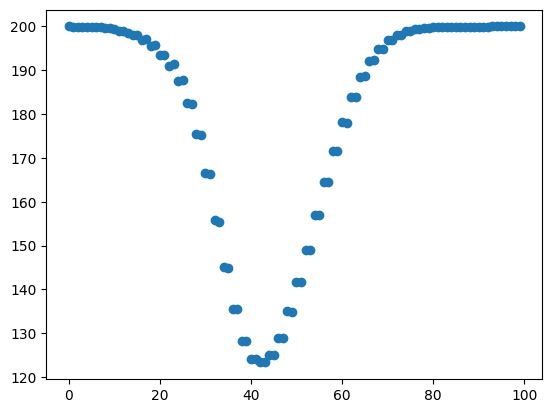

In [15]:
plt.plot(xyY[:, 5, 1, 2].flatten(), 'o')

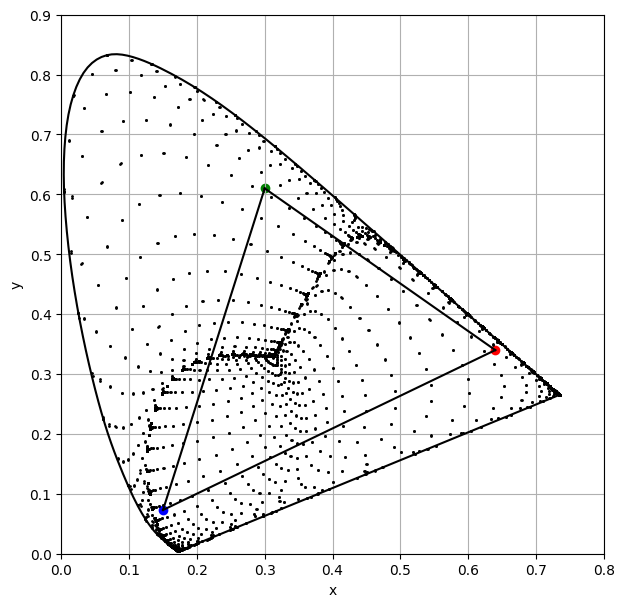

In [16]:
fig, ax = robsblobs.plotting.xyY_fig(monitor_Jing)
ax.plot(xyY[:, :, :, 0].flatten(), xyY[:, :, :, 1].flatten(), 'o', color='black', markersize=1)

Text(0.5, 0, 'Y')

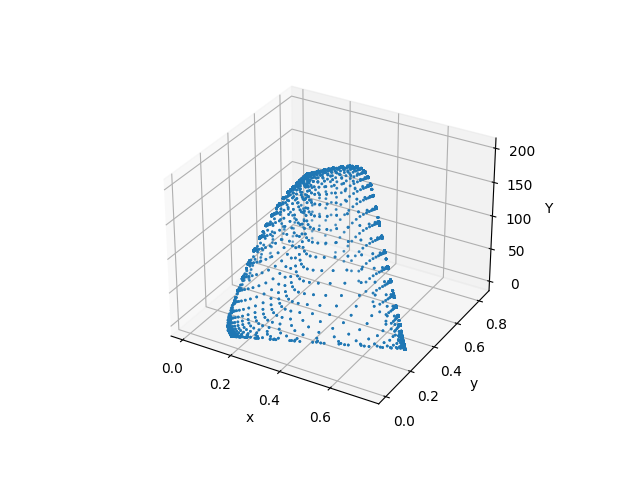

In [17]:
%matplotlib widget

# make a 3d plot of the xyY chromaticities
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyY[:, :, :, 0].flatten(), xyY[:, :, :, 1].flatten(), xyY[:, :, :, 2].flatten(), s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Y')

In [18]:
from scipy.interpolate import LinearNDInterpolator

xs = xyY[:, :, :, 0].flatten()
ys = xyY[:, :, :, 1].flatten()
zs = xyY[:, :, :, 2].flatten()
X = np.linspace(min(xs), max(xs))
Y = np.linspace(min(ys), max(ys))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
macadam_interp = LinearNDInterpolator(list(zip(xs, ys)), zs)
Z = macadam_interp(X, Y)

In [19]:
Z

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

(0.0, 0.9)

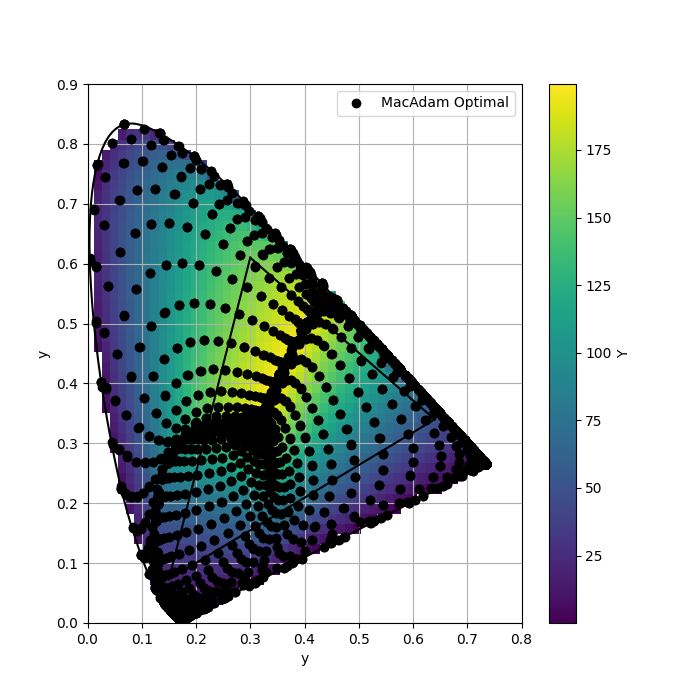

In [20]:
fig, ax = robsblobs.plotting.xyY_fig(monitor_Jing)
ax.plot(xyY[:, :, :, 0].flatten(), xyY[:, :, :, 1].flatten(), 'o', color='black', markersize=1)

plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(xs, ys, "ok", label="MacAdam Optimal")

plt.legend()
cbar = plt.colorbar()
cbar.set_label('Y')
plt.xlabel("x")
plt.xlabel("y")
plt.xlim((0, 0.8))
plt.ylim((0, 0.9))